# Análisis exploratorio de datos(EDA): retail sales dataset

Por: Juan Sebastián Agudelo Tamayo

Este notebook presenta un análisis exploratorio de datos (EDA) sobre el dataset de ventas minoristas, descargado de Kaggle.

Dataset: [Retail Sales Dataset - Kaggle](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)


In [11]:
#Importando las demás bibliotecas necesarias
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly
import matplotlib.colors as mcolors


In [12]:
# Cargar el archivo CSV
df = pd.read_csv("C:\\Users\\Sebastian\\Documents\\SEMESTRE 9\\CIENCIA DE DATOS\\retail_sales_dataset.csv")
print(df.head())

# Ver las columnas (variables) del conjunto de datos
print("Variables en el conjunto de datos:", df.columns)

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Variables en el conjunto de datos: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [13]:
#Indicar el número de filas y columnas
print("Shape del DataFrame:", df.shape)

# Información básica
print(df.info())


Shape del DataFrame: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [ ]:
# Estadísticas descriptivas
print(df.describe())

#las estadisticas descriptivas de transaction id no sirven, ya que solo es un numero que identifica la transaccion

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [15]:
# Valores faltantes por columna
missing_data = df.isnull().sum().sort_values(ascending=False)
print("\nValores faltantes por columna:\n", missing_data)



Valores faltantes por columna:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


no hay missing values o valores faltantes

In [20]:
print("Total de transacciones:", len(df))
print("Monto total de ventas: $", df['Total Amount'].sum())

Total de transacciones: 1000
Monto total de ventas: $ 456000


## Análisis Univariado

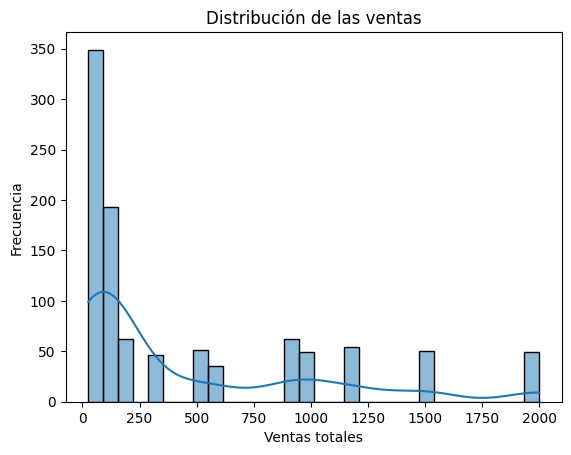

In [17]:
# Histograma de ventas
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title('Distribución de las ventas')
plt.xlabel('Ventas totales')
plt.ylabel('Frecuencia')
plt.show()


## Análisis Bivariado

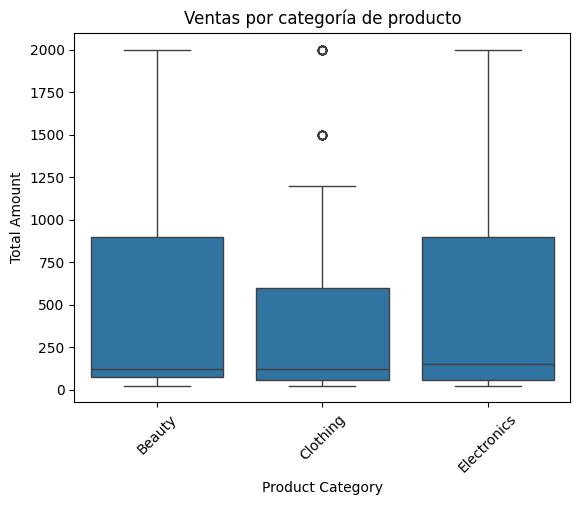

In [18]:
# Boxplot de ventas por categoría
if 'Product Category' in df.columns:
    sns.boxplot(x='Product Category', y='Total Amount', data=df)
    plt.xticks(rotation=45)
    plt.title('Ventas por categoría de producto')
    plt.show()


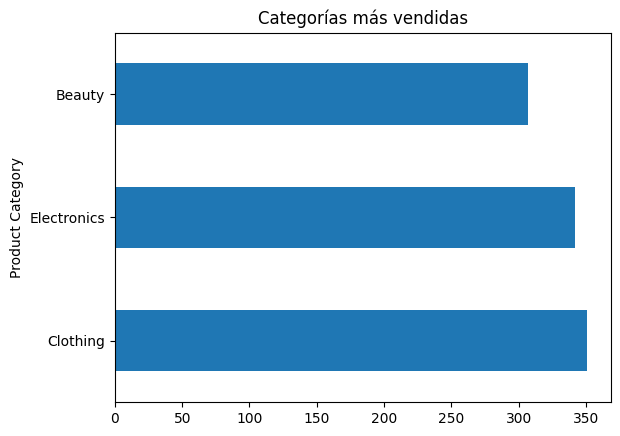

In [23]:
#Ventas totales por producto
df['Product Category'].value_counts().plot(kind='barh', title='Categorías más vendidas')
plt.show()

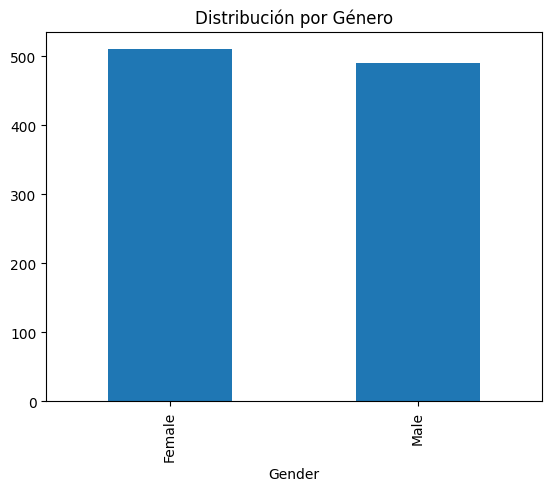

In [21]:
#Ventas toatles por genero
df['Gender'].value_counts().plot(kind='bar', title='Distribución por Género')
plt.show()

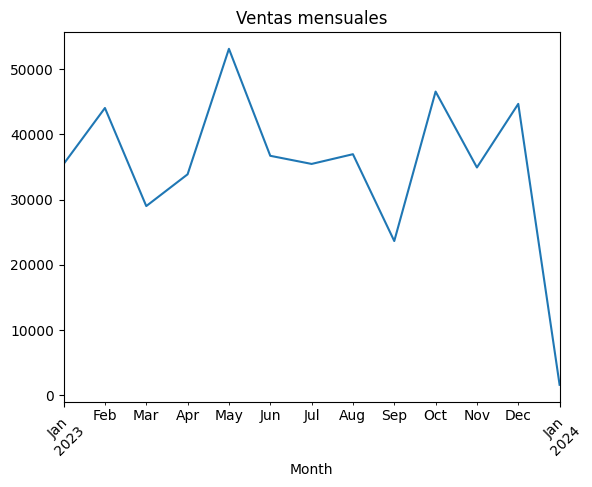

In [ ]:
#Ventas mensuales 
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')
df.groupby('Month')['Total Amount'].sum().plot(title='Ventas mensuales')
plt.xticks(rotation=45)
plt.show()

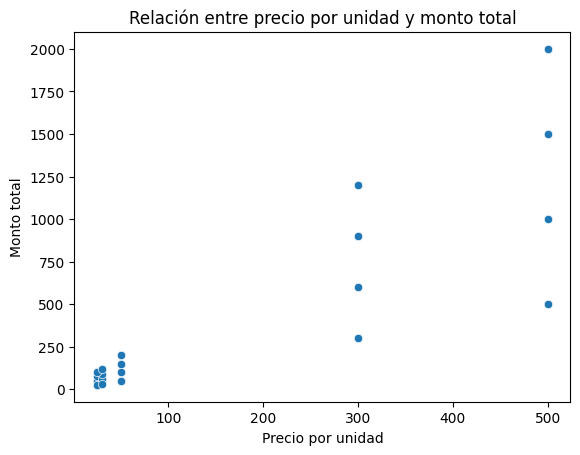

In [24]:
#Relación entre pecio por unidad y monto total
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df)
plt.title('Relación entre precio por unidad y monto total')
plt.xlabel('Precio por unidad')
plt.ylabel('Monto total')
plt.show()

## Correlaciones

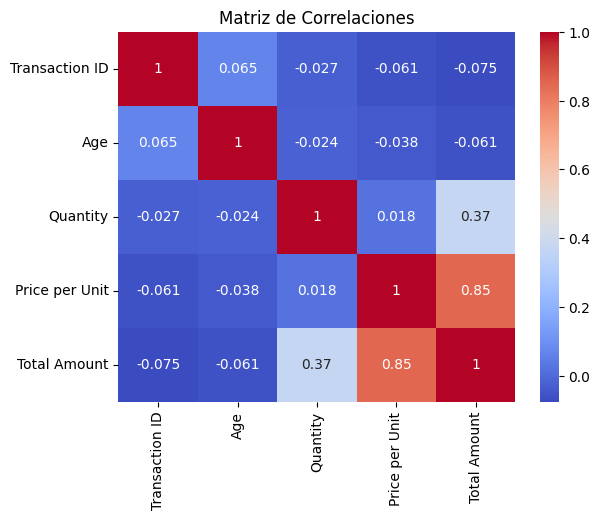

In [ ]:
# Matriz de correlaciones
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


## Hallazgos

1. Las ventas totales tienen una distribución sesgada hacia la derecha, lo que puede significar que muchas transacciones tienen un monto bajo, es decir, muchas compras pequeñas y pocas compras grandes.
2. Se observan diferencias importantes entre categorías de producto.
3. Las ventas tienden a concentrarse en ciertos periodos de tiempo cmo en mayo, octubre, diciembre, puede significar la existencia de patrones estacionales.
4. se observa paridad en el consumo por género, pero las mujeres muestran levemente mayor consumo que los hombres.
5. La variable Total Amount o ventas totales está fuertemente correlacionada Price per Unit o precio por unidad, como era de esperarse, dado que el precio depende denl total de las ventas.